<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Time_Leap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

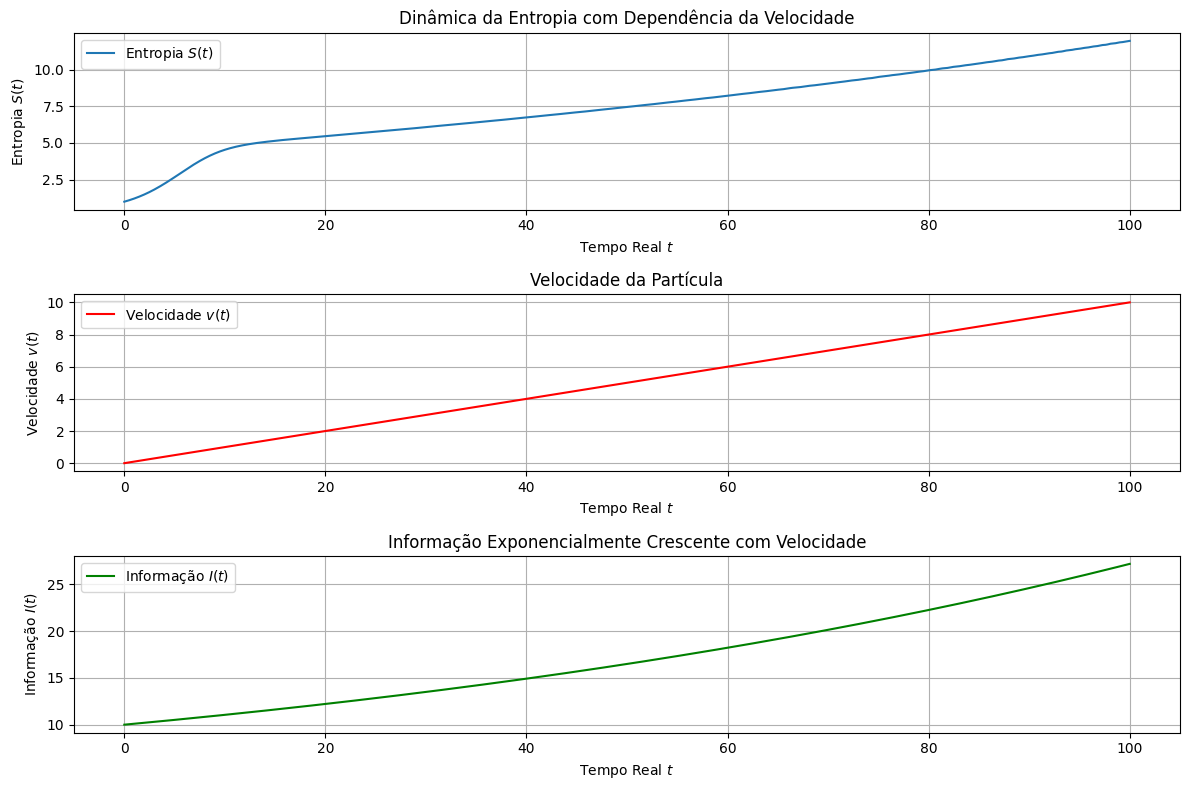

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Parâmetros do modelo
delta = 0.1  # Constante de proporcionalidade entre a informação e a velocidade
beta = 0.01  # Parâmetro do modelo não-linear
alpha = 0.2  # Parâmetro do modelo não-linear

# Função que relaciona a informação com a velocidade
def I(v):
    return 10.0 * np.exp(delta * v)

# Equação diferencial para a entropia em função da velocidade
def dS_dt(t, S, v_interp):
    v = v_interp(t)
    return alpha * S - beta * S**3 + 2 * beta * (10.0**2) * delta * np.exp(2 * delta * v) * v

# Equação diferencial para a velocidade (simplesmente uma aceleração constante para ilustração)
def dv_dt(t, v, a):
    return a

# Condições iniciais
S0 = 1.0
v0 = 0.0
a = 0.1  # Aceleração constante

# Intervalo de tempo
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Resolver a equação diferencial para a velocidade
sol_v = solve_ivp(dv_dt, t_span, [v0], args=(a,), t_eval=t_eval)
v = sol_v.y[0]

# Criar uma função de interpolação para v
v_interp = interp1d(t_eval, v, kind='cubic', fill_value='extrapolate')

# Resolver a equação diferencial para a entropia
sol_S = solve_ivp(dS_dt, t_span, [S0], args=(v_interp,), t_eval=t_eval)

# Calcular a informação
I_values = I(v)

# Calcular o tempo percebido a partir da informação independente
I_indep = 10.0 * np.exp(delta * t_eval)
t_percebido = np.log(I_indep) / delta

# Plotar os resultados
plt.figure(figsize=(12, 8))

# Plotar a entropia
plt.subplot(3, 1, 1)
plt.plot(sol_S.t, sol_S.y[0], label="Entropia $S(t)$")
plt.xlabel("Tempo Real $t$")
plt.ylabel("Entropia $S(t)$")
plt.title("Dinâmica da Entropia com Dependência da Velocidade")
plt.grid(True)
plt.legend()

# Plotar a velocidade
plt.subplot(3, 1, 2)
plt.plot(t_eval, v, label="Velocidade $v(t)$", color='r')
plt.xlabel("Tempo Real $t$")
plt.ylabel("Velocidade $v(t)$")
plt.title("Velocidade da Partícula")
plt.grid(True)
plt.legend()

# Plotar a informação
plt.subplot(3, 1, 3)
plt.plot(t_eval, I_values, label="Informação $I(t)$", color='g')
plt.xlabel("Tempo Real $t$")
plt.ylabel("Informação $I(t)$")
plt.title("Informação Exponencialmente Crescente com Velocidade")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
